In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots bigger
plt.rcParams["figure.figsize"] = (8,5)

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")


Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)

In [3]:
# Q1 Answer
print("Shape (rows, columns):", df.shape)
print("Column Names:", df.columns.tolist())
df.head(10)


Shape (rows, columns): (1061, 7)
Column Names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Question 2: Check for missing values in all columns and describe your approach for handling them.

In [4]:
# Q2 Answer
print("Missing values per column:")
print(df.isnull().sum())

# Handling approach:
# - Numeric columns → fill with median
# - Categorical columns → fill with mode

df_clean = df.copy()

num_cols = df_clean.select_dtypes(include=[np.number]).columns
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in cat_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

df_clean.isnull().sum()


Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


/tmp/ipython-input-1618443173.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-1618443173.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

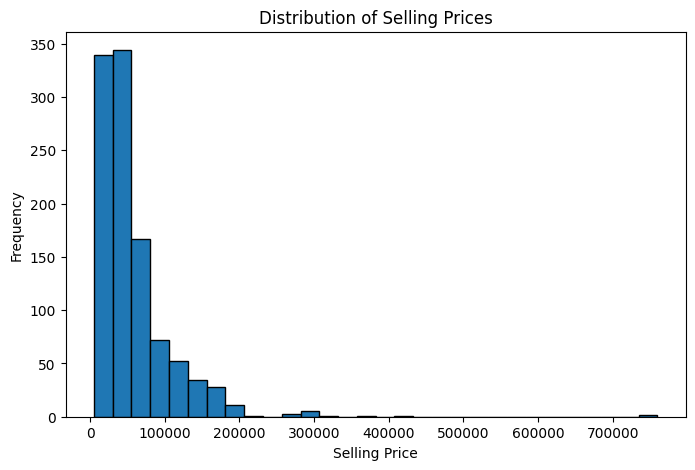

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [5]:
# Q3 Answer
df_clean["selling_price"] = pd.to_numeric(df_clean["selling_price"], errors="coerce")

df_clean["selling_price"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

df_clean["selling_price"].describe()


Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

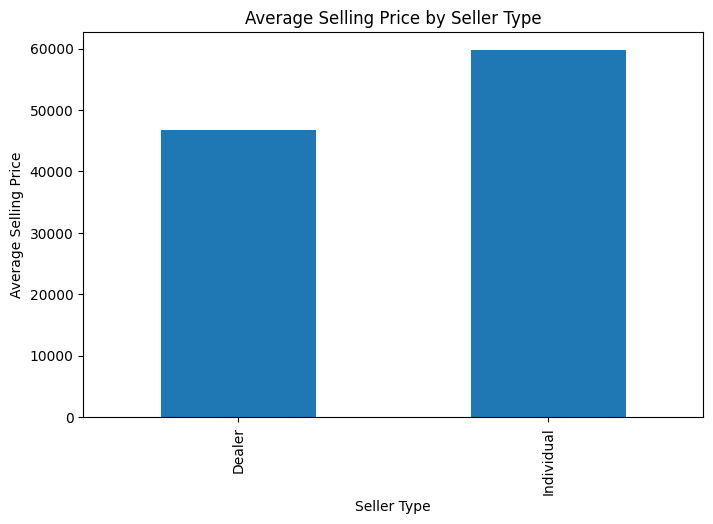

,selling_price
seller_type,
Dealer,46666.666667
Individual,59711.923223


In [6]:
# Q4 Answer
avg_price = df_clean.groupby("seller_type")["selling_price"].mean()

avg_price.plot(kind="bar")
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

avg_price


Question 5: Compute the average km_driven for each ownership type and present the result as a bar plot.

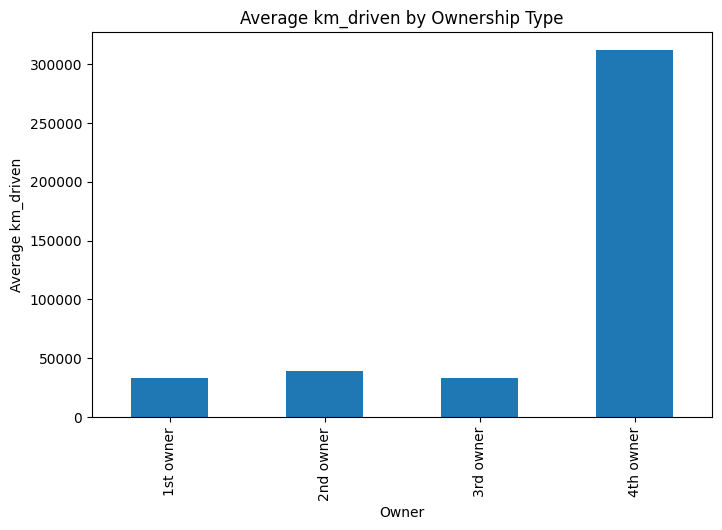

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [7]:
# Q5 Answer
df_clean["km_driven"] = pd.to_numeric(df_clean["km_driven"], errors="coerce")

avg_km = df_clean.groupby("owner")["km_driven"].mean()

avg_km.plot(kind="bar")
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Owner")
plt.ylabel("Average km_driven")
plt.show()

avg_km


Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [8]:
# Q6 Answer
print("Before removing outliers:")
print(df_clean["km_driven"].describe())

Q1 = df_clean["km_driven"].quantile(0.25)
Q3 = df_clean["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df_clean[(df_clean["km_driven"] >= lower) & (df_clean["km_driven"] <= upper)]

print("\nAfter removing outliers:")
print(df_no_outliers["km_driven"].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price.

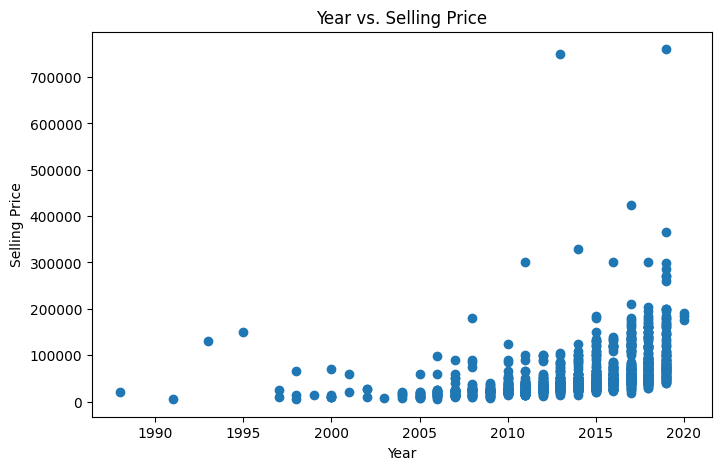

In [9]:
# Q7 Answer
plt.scatter(df_clean["year"], df_clean["selling_price"])
plt.title("Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot encoding.

In [10]:
# Q8 Answer
df_encoded = pd.get_dummies(df_clean, columns=["seller_type"], prefix="seller")
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,False,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,False,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.

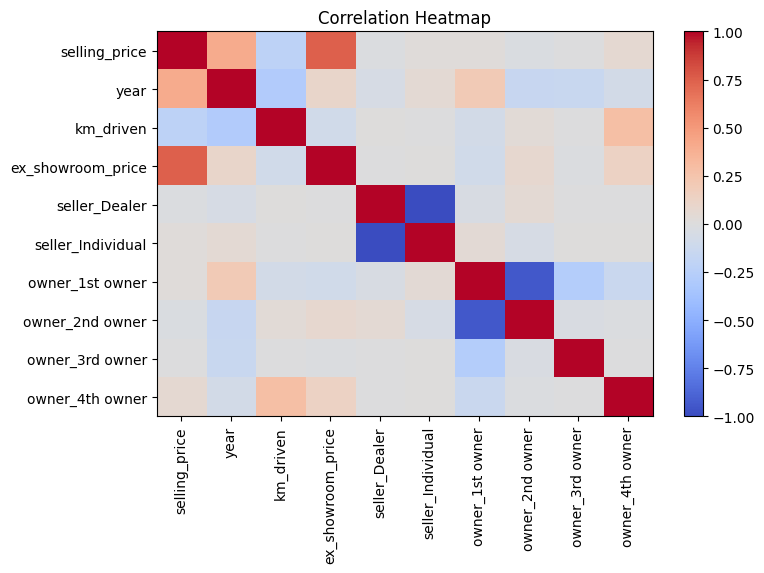

,selling_price
selling_price,1.000000
ex_showroom_price,0.744075
year,0.402188
owner_4th owner,0.055537
owner_1st owner,0.017751
seller_Individual,0.017382
owner_3rd owner,-0.007113
seller_Dealer,-0.017382
owner_2nd owner,-0.025555
km_driven,-0.212937


In [13]:
# Q9 Answer
# Drop the non-numeric 'name' column and one-hot encode 'owner' before calculating correlation
df_encoded = pd.get_dummies(df_clean, columns=["seller_type", "owner"], prefix=["seller", "owner"])
corr = df_encoded.drop("name", axis=1).corr()

plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

corr["selling_price"].sort_values(ascending=False)

Question 10: Summarize your findings in a brief report.

In [14]:
# Q10 Answer (textual summary)
print("""
Key Findings:
- Selling price distribution is right-skewed (most bikes are in lower price range).
- 'Individual' sellers tend to have higher average selling prices than Dealers.
- 2nd and 3rd owners drive their bikes more on average compared to 1st owners.
- Outlier removal from km_driven makes statistics more reliable.
- Newer bikes (higher year) are generally priced higher.
- Strongest correlation with selling price is ex_showroom_price (~0.74).

Data Cleaning & Feature Engineering:
- Missing values handled (median for numeric, mode for categorical).
- Converted columns to numeric where necessary.
- Outliers in km_driven removed using IQR.
- One-hot encoding applied on seller_type for ML readiness.
""")



Key Findings:
- Selling price distribution is right-skewed (most bikes are in lower price range).
- 'Individual' sellers tend to have higher average selling prices than Dealers.
- 2nd and 3rd owners drive their bikes more on average compared to 1st owners.
- Outlier removal from km_driven makes statistics more reliable.
- Newer bikes (higher year) are generally priced higher.
- Strongest correlation with selling price is ex_showroom_price (~0.74).

Data Cleaning & Feature Engineering:
- Missing values handled (median for numeric, mode for categorical).
- Converted columns to numeric where necessary.
- Outliers in km_driven removed using IQR.
- One-hot encoding applied on seller_type for ML readiness.

